In [ ]:
!pip install networkx
!pip install matplotlib

In [2]:
import networkx as nx
import pandas as pd 
import numpy as np

G = nx.Graph()


In [3]:
import json

nameToCCA3 = {}
CCA3toName = {}

#Build CCA3 maps & add nodes
with open('countries.json') as json_file:  
    data = json.load(json_file)
    for p in data:
        nameToCCA3[p['name']['common']] = p['cca3']
        CCA3toName[p['cca3']] = p['name']['common']
        #print(p['name']['common'])
        G.add_node(p['name']['common'])


In [5]:
with open('countries.json') as json_file:  
    data = json.load(json_file)
    for p in data:
        #print('Borders: ')
        #print(p['borders'])
        source = p['cca3']
        for dest in p['borders']:
            #print("FROM: " + CCA3toName[p['cca3']] + " TO: " + CCA3toName[dest])
            #print (dest)
            #print("FROM: " + CCA3toName[p['cca3']] + " TO: " + CCA3toName[dest])
            G.add_edge(CCA3toName[p['cca3']], CCA3toName[dest])
        #G.add_node(p['cca3'])

In [ ]:
print(G.number_of_nodes())
print(G.number_of_edges())

In [ ]:
list(G.nodes)

In [ ]:
list(G.edges) #these are undirected edges

In [6]:
#want to find shortest paths between our 20 countries
countries = ["Australia", "Brazil", "Canada", "Colombia", "Costa Rica", "France", "Germany", "Guatemala", "Hong Kong",
            "India", "Japan", "Mexico", "Netherlands", "New Zealand", "Philippines", "Singapore", "Sweden", "Turkey", "United Kingdom", "United States"];

allshortestpaths = nx.shortest_path(G)

In [7]:
allshortestpathsdict = {}

for x in countries:
    countryshortestpathsdict = {}
    for y in countries:
        if x != y and y in allshortestpaths[x].keys():
            #print(x)
            #print(y)
            #print(allshortestpaths[x][y])
            countryshortestpathsdict[y] = allshortestpaths[x][y]
    allshortestpathsdict[x] = countryshortestpathsdict

allshortestpathsdict

{'Australia': {},
 'Brazil': {'Canada': ['Brazil',
   'Colombia',
   'Panama',
   'Costa Rica',
   'Nicaragua',
   'Honduras',
   'Guatemala',
   'Mexico',
   'United States',
   'Canada'],
  'Colombia': ['Brazil', 'Colombia'],
  'Costa Rica': ['Brazil', 'Colombia', 'Panama', 'Costa Rica'],
  'Guatemala': ['Brazil',
   'Colombia',
   'Panama',
   'Costa Rica',
   'Nicaragua',
   'Honduras',
   'Guatemala'],
  'Mexico': ['Brazil',
   'Colombia',
   'Panama',
   'Costa Rica',
   'Nicaragua',
   'Honduras',
   'Guatemala',
   'Mexico'],
  'United States': ['Brazil',
   'Colombia',
   'Panama',
   'Costa Rica',
   'Nicaragua',
   'Honduras',
   'Guatemala',
   'Mexico',
   'United States']},
 'Canada': {'Brazil': ['Canada',
   'United States',
   'Mexico',
   'Guatemala',
   'Honduras',
   'Nicaragua',
   'Costa Rica',
   'Panama',
   'Colombia',
   'Brazil'],
  'Colombia': ['Canada',
   'United States',
   'Mexico',
   'Guatemala',
   'Honduras',
   'Nicaragua',
   'Costa Rica',
   'Panam

In [8]:
cosSim = pd.read_csv("normalizedCosSimilarity.csv") 
cosSim.head()

topquarter = []
secondquarter = []
thirdquarter = []
fourthquarter = []
counter = 0
for idx, row in cosSim.iterrows():
    if counter < 47 and row[0] != row[1] and row[1] in allshortestpathsdict[row[0]].keys():
        print (row[0] + ", " + row[1])
        print(allshortestpathsdict[row[0]][row[1]])
        topquarter.append(len(allshortestpathsdict[row[0]][row[1]]))
    elif counter < 94 and row[0] != row[1] and row[1] in allshortestpathsdict[row[0]].keys():
        print (row[0] + ", " + row[1])
        print(allshortestpathsdict[row[0]][row[1]])
        secondquarter.append(len(allshortestpathsdict[row[0]][row[1]]))
    elif counter < 141 and row[0] != row[1] and row[1] in allshortestpathsdict[row[0]].keys():
        print (row[0] + ", " + row[1])
        print(allshortestpathsdict[row[0]][row[1]])
        thirdquarter.append(len(allshortestpathsdict[row[0]][row[1]]))
    elif row[0] != row[1] and row[1] in allshortestpathsdict[row[0]].keys():
        print (row[0] + ", " + row[1])
        print(allshortestpathsdict[row[0]][row[1]])
        fourthquarter.append(len(allshortestpathsdict[row[0]][row[1]]))
    counter+=1

#nodearr = pd.unique(trade[['Country 1', 'Country 2']].values.ravel('K'))
#for n in nodearr:
#    G.add_node(n)

#for idx, row in trade.iterrows():
#    G.add_edge(row[0], row[1])

Guatemala, Mexico
['Guatemala', 'Mexico']
Sweden, Hong Kong
['Sweden', 'Finland', 'Russia', 'China', 'Hong Kong']
Hong Kong, India
['Hong Kong', 'China', 'India']
Turkey, Netherlands
['Turkey', 'Azerbaijan', 'Russia', 'Poland', 'Germany', 'Netherlands']
France, Germany
['France', 'Germany']
Turkey, Hong Kong
['Turkey', 'Azerbaijan', 'Russia', 'China', 'Hong Kong']
United States, Canada
['United States', 'Canada']
Sweden, India
['Sweden', 'Finland', 'Russia', 'China', 'India']
Sweden, Netherlands
['Sweden', 'Finland', 'Russia', 'Poland', 'Germany', 'Netherlands']
Hong Kong, Netherlands
['Hong Kong', 'China', 'Russia', 'Poland', 'Germany', 'Netherlands']
Colombia, Mexico
['Colombia', 'Panama', 'Costa Rica', 'Nicaragua', 'Honduras', 'Guatemala', 'Mexico']
Turkey, India
['Turkey', 'Iran', 'Pakistan', 'India']
Turkey, Sweden
['Turkey', 'Azerbaijan', 'Russia', 'Finland', 'Sweden']
France, Netherlands
['France', 'Belgium', 'Netherlands']
India, Netherlands
['India', 'China', 'Russia', 'Poland

In [9]:
print(np.mean(topquarter))
print(np.mean(secondquarter))
print(np.mean(thirdquarter))
print(np.mean(fourthquarter))


4.454545454545454
4.833333333333333
5.857142857142857
5.416666666666667


In [10]:
Gsmall = nx.Graph()
ctr = 0
radius = 8
for n in countries:
    Gsmall.add_node(n, pos=(radius*np.sin(ctr), radius*np.cos(ctr)))
    ctr+=2*np.pi/20
for orig_country, country_info in allshortestpathsdict.items():
    for dest_country, path in country_info.items():
        #print("ADDING EDGE FROM " + orig_country + " TO " + dest_country)
        Gsmall.add_edge(orig_country, dest_country, weight=len(path)-1)



In [ ]:
list(Gsmall.nodes)
list(Gsmall.edges)

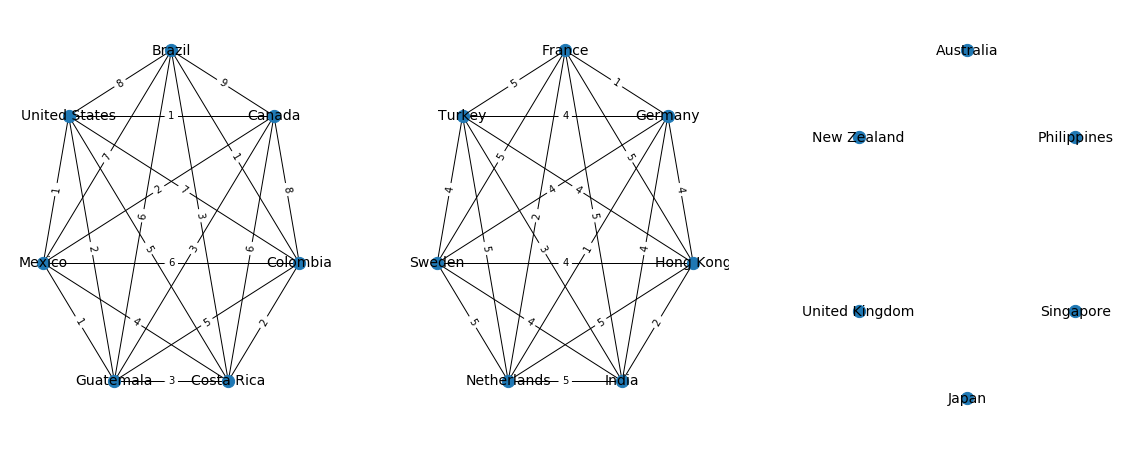

In [11]:
import json
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

NAMlist = ['Brazil', 'Canada', 'Colombia', 'Costa Rica', 'Guatemala', 'Mexico', 'United States']
NAM = Gsmall.subgraph(NAMlist)
EurAlist = ['France', 'Germany', 'Hong Kong', 'India', 'Netherlands', 'Sweden', 'Turkey']
EurA = Gsmall.subgraph(EurAlist)
Isolist = ["Australia", "Philippines", "Singapore", "Japan", "United Kingdom", "New Zealand"]
Iso = Gsmall.subgraph(Isolist)

#nx.draw(NAM)

plt.figure(figsize=(20,8))
plt.subplot(131)
for i in range(len(NAM.nodes)):
    NAM.nodes[NAMlist[i]]['pos'] = (radius*np.sin(ctr), radius*np.cos(ctr))
    ctr+=2*np.pi/len(NAM.nodes)
pos = nx.get_node_attributes(NAM,'pos')
labels = nx.get_edge_attributes(NAM,'weight')
# nx.draw_shell(NAM)
nx.draw_networkx(NAM, pos, font_size=14, node_size=150)
nx.draw_networkx_edge_labels(NAM, pos, edge_labels = labels)
axes = plt.gca()
axes.set_xlim([-radius-2,radius+2])
axes.set_ylim([-radius-2,radius+2])
plt.axis('off')

plt.subplot(132)
for i in range(len(EurA.nodes)):
    EurA.nodes[EurAlist[i]]['pos'] = (radius*np.sin(ctr), radius*np.cos(ctr))
    ctr+=2*np.pi/len(EurA.nodes)
pos = nx.get_node_attributes(EurA,'pos')
labels = nx.get_edge_attributes(EurA,'weight')
nx.draw_networkx(EurA, pos, font_size=14, node_size=150)
nx.draw_networkx_edge_labels(EurA, pos, edge_labels = labels)
axes = plt.gca()
axes.set_xlim([-radius-2,radius+2])
axes.set_ylim([-radius-2,radius+2])
plt.axis('off')

plt.subplot(133)
for i in range(len(Iso.nodes)):
    Iso.nodes[Isolist[i]]['pos'] = (radius*np.sin(ctr), radius*np.cos(ctr))
    ctr+=2*np.pi/len(Iso.nodes)
pos = nx.get_node_attributes(Iso,'pos')
labels = nx.get_edge_attributes(Iso,'weight')
nx.draw_networkx(Iso, pos, font_size=14, node_size=150)
nx.draw_networkx_edge_labels(Iso, pos, edge_labels = labels)
axes = plt.gca()
axes.set_xlim([-radius-3,radius+2])
axes.set_ylim([-radius-2,radius+2])
plt.axis('off')

plt.show()

